# Working with sysmlv2 models and the API

## This is a notebook walks through a SysMLv2 create, publish, and interogate cycle when using the API <br> (partially based on the pyMBE kerbal example)

## 1 - Lets make a simple sysmlv2 model and view the model diagram

In [30]:
package jdehart_api_demo {
    import ScalarValues::*;
    
    part A {
        attribute mass : Real = 30;
    }
    package internal {
        part B {
            part C;
            part D;
    }
    }
    
}

Package jdehart_api_demo (dc07cba3-60ae-44b5-8f13-21a641daa2bb)


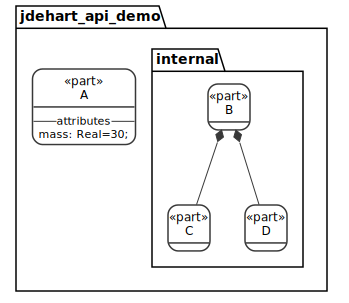

In [31]:
%viz jdehart_api_demo

## 2 - Now lets publish the model to the API

In [32]:
%publish jdehart_api_demo

API base path: http://sysml2.intercax.com:9000
Processing
Posting Commit (21 elements)...
Error: 0 Missing the required parameter 'projectId' when calling postCommitByProject(Async)



java.lang.NullPointerException
	at org.omg.sysml.util.traversal.facade.impl.ApiElementProcessingFacade.getProjectId(ApiElementProcessingFacade.java:156)
	at org.omg.sysml.interactive.SysMLInteractive.publish(SysMLInteractive.java:293)
	at org.omg.sysml.jupyter.kernel.magic.Publish.publish(Publish.java:41)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at io.github.spencerpark.jupyter.kernel.magic.registry.Magics.invoke(Magics.java:89)
	at io.github.spencerpark.jupyter.kernel.magic.registry.Magics.access$000(Magics.java:8)
	at io.github.spencerpark.jupyter.kernel.magic.registry.Magics$LineReflectionMagicFunction.execute(Magics.java:149)
	at io.github.spencerpark.jupyter.kernel.magic

## 3 - Now lets fetch a list of models from the API and create a dropdown box to select a particular model from (Dont look at this stuff... it messy for a slide)

In [33]:
from __future__ import print_function

import requests
import getpass
import math

import time
import sysml_v2_api_client
from sysml_v2_api_client.rest import ApiException
from pprint import pprint

import json
import networkx as NX
import matplotlib.pyplot as plt

import random
import copy

import pymbe.api as pm
#from pymbe.model_loading import ModelingSession as Session
#from pymbe.interpretation.interpretation import RandomGenerationStrategy as RGS

In [34]:
import pymbe.query as pmQuery

## 4 - Configure API Server Connection

In [35]:
sysml_api_base_url = 'http://sysml2.intercax.com:9000' # http://sysml2-sst.intercax.com:9000

Activate APIs - Connect the API classes to the server

In [36]:
configuration = sysml_v2_api_client.Configuration(
    host = sysml_api_base_url
)

projects_api_instance = None

with sysml_v2_api_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    project_api_instance = sysml_v2_api_client.ProjectApi(api_client)
    
commits_api_instance = None

with sysml_v2_api_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    commits_api_instance = sysml_v2_api_client.CommitApi(api_client)
    
elements_api_instance = None

with sysml_v2_api_client.ApiClient(configuration) as api_client:
    # Create an instance of the API class
    elements_api_instance = sysml_v2_api_client.ElementApi(api_client)

Pull down commits and elements catalogs - With the API handles, use the pre-built methods to get lists of commits and elements.

In [20]:
project_api_instance

## 5  Now get a list of my projects from the API server

In [21]:
q_string = "jdehart"
my_projects = [my_proj for my_proj in project_api_instance.get_projects() if my_proj.name.find(q_string) > -1]
my_projects

[{'default_branch': {'id': None},
  'description': None,
  'id': None,
  'name': 'jdehart_api_demo Tue Aug 03 17:35:53 UTC 2021',
  'type': 'Project'},
 {'default_branch': {'id': None},
  'description': None,
  'id': None,
  'name': 'jdehart_api_demo Tue Aug 03 17:36:17 UTC 2021',
  'type': 'Project'},
 {'default_branch': {'id': None},
  'description': None,
  'id': None,
  'name': 'jdehart_api_demo Tue Aug 03 17:36:10 UTC 2021',
  'type': 'Project'}]

## 6 - Create a dropdown box with my projects

In [22]:
# get the project names into a list
model_names = []
for key, value in enumerate(my_projects):
    model_names.append(my_projects[key].name)
model_names

['jdehart_api_demo Tue Aug 03 17:35:53 UTC 2021',
 'jdehart_api_demo Tue Aug 03 17:36:17 UTC 2021',
 'jdehart_api_demo Tue Aug 03 17:36:10 UTC 2021']

In [28]:
# create the dropdown box and populate with my project names
from IPython.display import display
from ipywidgets import Dropdown

def dropdown_eventhandler(change):
    global model_id
    model_id = change.new

option_list = model_names
dropdown = Dropdown(description="Select Project:", options=option_list)
dropdown.observe(dropdown_eventhandler, names='index')
display(dropdown)
### pick the api dem @16:36

Dropdown(description='Select Project:', options=('jdehart_api_demo Tue Aug 03 17:35:53 UTC 2021', 'jdehart_api…

In [29]:
# get the last commit
try:
    # Get commits by project
    commits_response = commits_api_instance.get_commits_by_project(my_projects[model_id].id)
    pprint(commits_response)
except ApiException as e:
    print("Exception when calling CommitApi->get_commits_by_project: %s\n" % e)

ApiValueError: Missing the required parameter `project_id` when calling `get_commits_by_project`

In [27]:
# get a list of elements
elements = []
try:
    # Get commits by project
    elements = elements_api_instance.get_elements_by_project_commit(my_projects[model_id].id, commits_response[0].id)
except ApiException as e:
    print("Exception when calling ElementApi->get_elements_by_project_commit: %s\n" % e)

NameError: name 'commits_response' is not defined

In [18]:
len(elements)

37

In [19]:
# here is an example of what we are working wiht as JSON file
pprint(elements)

[{'id': '0a2cca58-06b2-4f3e-b7f8-d69a7f48e4e0',
 'identifier': '0a2cca58-06b2-4f3e-b7f8-d69a7f48e4e0',
 'type': 'PartUsage'},
 {'id': '10eb025a-f3da-4140-a0e8-80a33be8b734',
 'identifier': '10eb025a-f3da-4140-a0e8-80a33be8b734',
 'type': 'Package'},
 {'id': '17508f98-e3a4-4077-a99a-6d2b1025db45',
 'identifier': '17508f98-e3a4-4077-a99a-6d2b1025db45',
 'type': 'EndFeatureMembership'},
 {'id': '1a75db52-3597-40d8-9879-67f76d0b1db9',
 'identifier': '1a75db52-3597-40d8-9879-67f76d0b1db9',
 'type': 'PartUsage'},
 {'id': '1c745816-847a-4e63-8a7f-3e7d336d0fe4',
 'identifier': '1c745816-847a-4e63-8a7f-3e7d336d0fe4',
 'type': 'PortDefinition'},
 {'id': '1ce96367-7138-4982-9d0f-47567d1c083c',
 'identifier': '1ce96367-7138-4982-9d0f-47567d1c083c',
 'type': 'Feature'},
 {'id': '1d11e8c9-c29a-4645-be3d-b038e22f436f',
 'identifier': '1d11e8c9-c29a-4645-be3d-b038e22f436f',
 'type': 'FeatureTyping'},
 {'id': '28399c55-100d-4f91-96f7-3c2be3a67dd7',
 'identifier': '28399c55-100d-4f91-96f7-3c2be3a67dd7',

With the elements known we can then get each elements data with an API call

In [20]:
elements_url = (sysml_api_base_url +
                '/projects/{0}/commits/{1}/elements?page[size]=2000').format(my_projects[model_id].id, commits_response[0].id)

In [21]:
elements_url

'http://sysml2.intercax.com:9000/projects/5552675c-7295-4f6e-ab41-15e594b40fd4/commits/3a473469-b1ef-4d9f-89b7-9d1a1d253352/elements?page[size]=2000'

In [22]:
elements_response = requests.get(
    elements_url
)

In [23]:
%put elements_data
elements_data = elements_response.json()

Now we can show the element data in a tree view

In [24]:
%get elements_data
from IPython.display import JSON
JSON(elements_data)

<IPython.core.display.JSON object>

Lets now  look at the elements in a table view

In [26]:
import pandas as pd
import numpy as np
import qgrid
df = pd.DataFrame(elements_data)
#df = df.replace(np.nan, '', regex=True)
qw = qgrid.show_grid(df, show_toolbar=True)
qw

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Thats a big table... lets narrow it down a bit

In [69]:
df[["@id","@type","name","owningFeatureMembership","owningRelatedElement"]]

,@id,@type,name,owningFeatureMembership,owningRelatedElement
0,05e851d9-58c3-47e3-a217-b494bd16acba,FeatureReferenceExpression,None,{'@id': '2484d02d-3438-43b1-be29-c5583ad0768c'},NaN
1,062efadd-af47-4bd5-8eeb-cb13fef09ce7,ReturnParameterMembership,None,NaN,{'@id': 'd89e9793-543c-40d0-b164-b9f2b6d0c328'}
2,07b9391d-0448-45ec-9978-7152071e559a,FeatureMembership,None,NaN,{'@id': 'd89e9793-543c-40d0-b164-b9f2b6d0c328'}
3,07f6304a-222c-432a-bd3a-795196ddf1c5,AttributeUsage,massCapacity,{'@id': '65db342e-6b85-43ca-a41a-06851aacfe88'},NaN
4,08fc48ff-4fa3-4daf-918f-e1623e087acd,FeatureTyping,None,NaN,{'@id': 'bdeccf29-e1ed-4a40-9fc1-e12d32a28f66'}
...,...,...,...,...,...
149,f8b25680-4366-490c-b70a-784d2ddeb829,ReturnParameterMembership,None,NaN,{'@id': '05e851d9-58c3-47e3-a217-b494bd16acba'}
150,faf2f72c-61ad-4fc8-8694-bd2e3e7bd801,Comment,None,NaN,NaN
151,fc2fdc7d-ad32-49e1-bedf-0d08b31b417c,AttributeUsage,cost,{'@id': 'fd78386f-1804-4fac-bb12-96538f9fa45c'},NaN
152,fd78386f-1804-4fac-bb12-96538f9fa45c,FeatureMembership,None,NaN,{'@id': '850bfc13-b0ab-4f15-a832-3b09a907183a'}


Now I would love to change an attribute and push it back up.... but how :)